In [117]:
#apertura e filtro del DataSet di outputs con i txIds delle transazioni valide
odf = pd.read_csv("./datasets/outputs.csv", names=['txId', 'position', 'adressId', 'amount','scripttype'], dtype={'txId':'int32','position':'int32','adressId':'int64','amount':'int32','scripttype':'category'})
odf.drop(['position' , 'amount', 'adressId'], axis=1, inplace=True)
# print(odf)

#creo una counts series e la coverto a dataframe 
counts = pd.DataFrame(odf.value_counts())

(24613799, 2)
(5906, 2)
(707927, 2)
(23899630, 2)
(336, 2)


In [118]:
tdf = pd.read_csv("./datasets/transactions.csv", 
                  names=['timestamp', 'blockId', 'txId', 'isCoinbase','fee'] , 
                  dtype={'timestamp':'int32' , 'blockId':'int32', 'txId':'int32' , 'isCoinbase':'bool' , 'fee':'int64'})

In [148]:
typedf = pd.DataFrame()
typedf[['timestamp','txId']] = tdf[['timestamp','txId']]

print(typedf)



for script_type , new_df in counts.groupby(level=1):
    # output_df.append(new_df['count'])
    new_df.set_index(new_df.index.get_level_values(0), inplace=True)
    new_df.rename(columns={'count' : script_type}, inplace=True)
    typedf = pd.merge(
        typedf,
        new_df[script_type],
        on='txId',
        how='left',
    )

typedf.fillna(0, inplace=True)
print(typedf)

typedf['timestamp'] = pd.to_datetime(typedf['timestamp'], unit='s')

weekly_typedf = pd.DataFrame()

weekly_typedf['0'] = typedf.resample('W-MON' , on='timestamp')['0'].sum()
weekly_typedf['1'] = typedf.resample('W-MON' , on='timestamp')['1'].sum()
weekly_typedf['2'] = typedf.resample('W-MON' , on='timestamp')['2'].sum()
weekly_typedf['3'] = typedf.resample('W-MON' , on='timestamp')['3'].sum()

print(weekly_typedf)



           timestamp      txId
0         1231006505         0
1         1231469665         1
2         1231469744         2
3         1231470173         3
4         1231470988         4
...              ...       ...
10572824  1356997957  10572822
10572825  1356997957  10572823
10572826  1356997957  10572824
10572827  1356997957  10572825
10572828  1356997957  10572826

[10572829 rows x 2 columns]


/var/folders/k5/hv224hb94mbd_04zpwlf07g80000gn/T/ipykernel_65118/2210832412.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for script_type , new_df in counts.groupby(level=1):


           timestamp      txId    1    2    0    3
0         1231006505         0  1.0  0.0  0.0  0.0
1         1231469665         1  1.0  0.0  0.0  0.0
2         1231469744         2  1.0  0.0  0.0  0.0
3         1231470173         3  1.0  0.0  0.0  0.0
4         1231470988         4  1.0  0.0  0.0  0.0
...              ...       ...  ...  ...  ...  ...
10572824  1356997957  10572822  0.0  2.0  0.0  0.0
10572825  1356997957  10572823  0.0  2.0  0.0  0.0
10572826  1356997957  10572824  0.0  2.0  0.0  0.0
10572827  1356997957  10572825  0.0  2.0  0.0  0.0
10572828  1356997957  10572826  0.0  3.0  0.0  0.0

[10572829 rows x 6 columns]
                0       1         2    3
timestamp                               
2009-01-05    0.0     1.0       0.0  0.0
2009-01-12    0.0   274.0       0.0  0.0
2009-01-19    0.0   835.0       2.0  0.0
2009-01-26    0.0   884.0       3.0  0.0
2009-02-02    0.0   827.0       4.0  0.0
...           ...     ...       ...  ...
2012-12-03  128.0  8289.0  4962

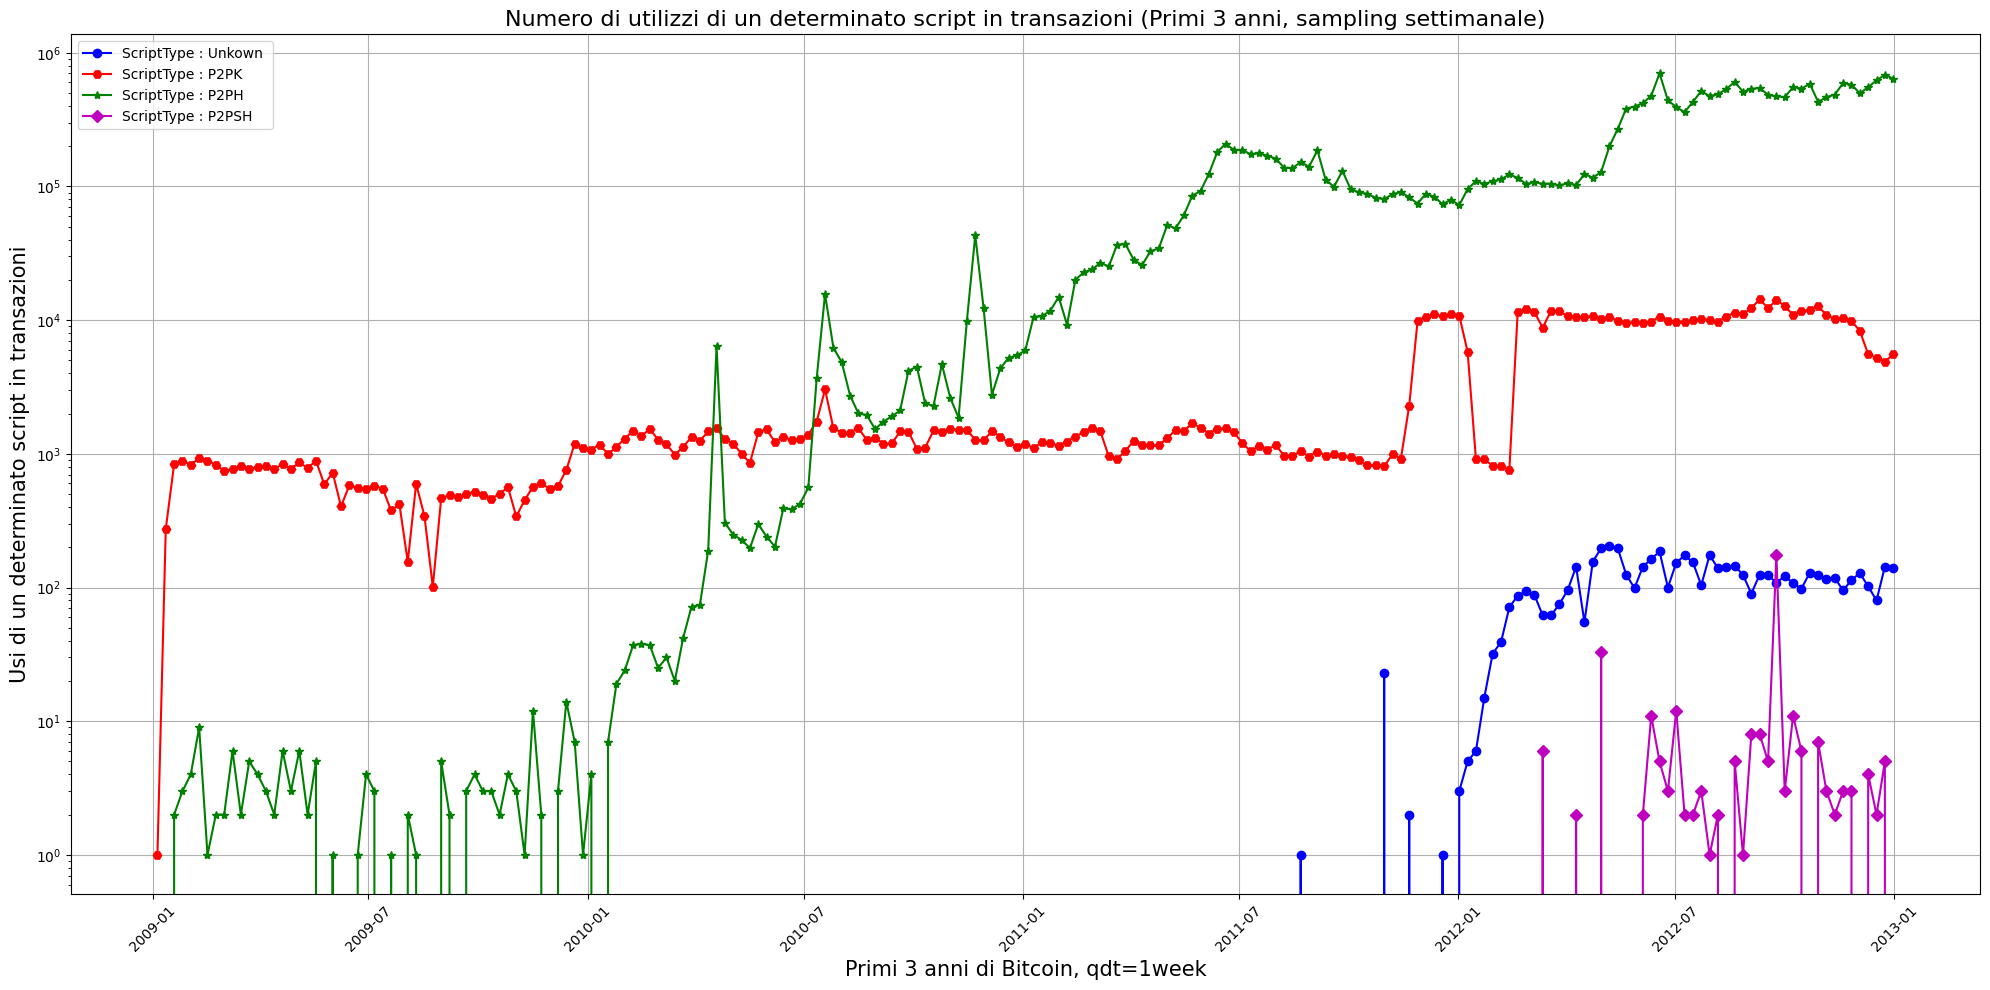

In [149]:
#creazione del grafico di comparazione con pyplot
import matplotlib.pyplot as plt
plt.rcParams['agg.path.chunksize'] = 1000  # Aumento la chunksize per evitare problemi con plot con molti dati

plt.figure(figsize=(20, 10))  # Dimensione della figura

# Plot 0 
plt.plot(weekly_typedf.index, weekly_typedf['0'], label='ScriptType : Unkown ', marker='o', color='b')
# Plot 1 
plt.plot(weekly_typedf.index, weekly_typedf['1'], label='ScriptType : P2PK ', marker='H', color='r')
# Plot 2
plt.plot(weekly_typedf.index, weekly_typedf['2'], label='ScriptType : P2PH ', marker='*', color='g')
# Plot 3
plt.plot(weekly_typedf.index, weekly_typedf['3'], label='ScriptType : P2PSH ', marker='D', color='m')



# Imposto la scala logaritmica per l'asse delle y per rendere le differenze piu' evidenti e comprensibili
plt.yscale('log')  # Set y-axis to logarithmic scale for fee

# Imposto le label varie
plt.xlabel("Primi 3 anni di Bitcoin, qdt=1week", fontsize=15)
plt.ylabel("Usi di un determinato script in transazioni", fontsize=15)
plt.title("Numero di utilizzi di un determinato script in transazioni (Primi 3 anni, sampling settimanale)", fontsize=16) #Titolo
plt.xticks(rotation=45)  # Ruoto le label dell'asse delle x per renderlo piu' semplice da leggere
plt.grid(True)  
plt.legend()  

plt.tight_layout()  # Aggiusto lo spacing tra gli elementi
plt.show()

In [152]:
# apertura e setup del dataframe delle transazioni, per ora mi interessano solo i txId che non sono coinbase e le loro fee
tdf = pd.read_csv("./datasets/transactions.csv", 
                  names=['timestamp', 'blockId', 'txId', 'isCoinbase','fee'] , 
                  dtype={'timestamp':'int32' , 'blockId':'int32', 'txId':'int32' , 'isCoinbase':'bool' , 'fee':'int64'})
tdf = tdf[tdf['isCoinbase'] == 0]
tdf.drop(['blockId', 'isCoinbase'], axis=1, inplace=True)
print(tdf)

#creo una lista delle transazioni valide per poter filtrare gli input e output 
valid_txid = tdf['txId'].tolist()

#apertura e filtro del DataSet di outputs con i txIds delle transazioni valide
odf = pd.read_csv("./datasets/outputs.csv", names=['txId', 'position', 'adressId', 'amount','scripttype'], dtype={'txId':'int32','position':'int32','adressId':'int64','amount':'int32','scripttype':'category'})
odf.drop(['position' , 'amount', 'adressId'], axis=1, inplace=True)
odf = odf[odf['txId'].isin(valid_txid)]
# print(odf)

## processo l'outputs dataframe
script_sizes = {'0': 0 , '1': 153, '2': 180, '3': 291}  # Coefficenti della size per i diversi scripttype

#creo una counts series e la coverto a dataframe 
counts = pd.DataFrame(odf.value_counts())

#1. creo un array dove salvare i diversi dataframe che ottengo con la groupby
#2. Ottengo una series per tipo di scripttype contenente il txId della transazione in output e quanti output con quel determinato txId e scripttype sono presenti nel dataset outputs
#.3 Infine concateno le diverse series in una unica, che viene convertita in df e unita al Dataframe delle transazioni


sizedf = pd.DataFrame()
sizedf[['timestamp','txId']] = tdf[['timestamp','txId']]

print(sizedf)



for script_type , new_df in counts.groupby(level=1):
    # output_df.append(new_df['count'])
    new_df.set_index(new_df.index.get_level_values(0), inplace=True)
    new_df.rename(columns={'count' : script_type}, inplace=True)
    sizedf = pd.merge(
        sizedf,
        new_df[script_type],
        on='txId',
        how='left',
    )

sizedf.fillna(0, inplace=True)
sizedf['tx_output_size'] = sizedf['1'] * (9 + 153) + sizedf['2'] * (9 + 180) + sizedf['3'] * (9 + 291)

print(sizedf)
tdf = pd.merge(
  tdf ,
  sizedf[['txId','tx_output_size']] , 
  on='txId' ,
  how='left' ,
)

print(tdf)

           timestamp      txId     fee
171       1231731025       171       0
183       1231740133       183       0
185       1231740736       185       0
187       1231742062       187       0
192       1231744600       192       0
...              ...       ...     ...
10572824  1356997957  10572822  100000
10572825  1356997957  10572823  100000
10572826  1356997957  10572824  100000
10572827  1356997957  10572825  100000
10572828  1356997957  10572826  100000

[10358266 rows x 3 columns]
           timestamp      txId
171       1231731025       171
183       1231740133       183
185       1231740736       185
187       1231742062       187
192       1231744600       192
...              ...       ...
10572824  1356997957  10572822
10572825  1356997957  10572823
10572826  1356997957  10572824
10572827  1356997957  10572825
10572828  1356997957  10572826

[10358266 rows x 2 columns]


/var/folders/k5/hv224hb94mbd_04zpwlf07g80000gn/T/ipykernel_65118/1981302589.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for script_type , new_df in counts.groupby(level=1):


           timestamp      txId    1    2    0    3  tx_output_size
0         1231731025       171  2.0  0.0  0.0  0.0           324.0
1         1231740133       183  2.0  0.0  0.0  0.0           324.0
2         1231740736       185  2.0  0.0  0.0  0.0           324.0
3         1231742062       187  2.0  0.0  0.0  0.0           324.0
4         1231744600       192  1.0  0.0  0.0  0.0           162.0
...              ...       ...  ...  ...  ...  ...             ...
10358261  1356997957  10572822  0.0  2.0  0.0  0.0           378.0
10358262  1356997957  10572823  0.0  2.0  0.0  0.0           378.0
10358263  1356997957  10572824  0.0  2.0  0.0  0.0           378.0
10358264  1356997957  10572825  0.0  2.0  0.0  0.0           378.0
10358265  1356997957  10572826  0.0  3.0  0.0  0.0           567.0

[10358266 rows x 7 columns]
           timestamp      txId     fee  tx_output_size
0         1231731025       171       0           324.0
1         1231740133       183       0           324.0
2 